# Handle external File Imports

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


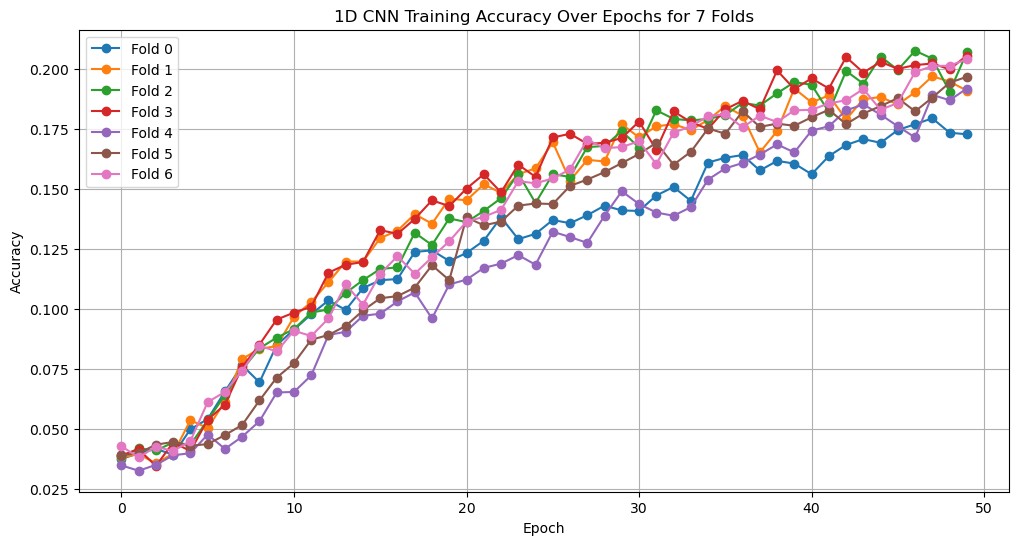

In [85]:
# Initialize a figure for better visibility
plt.figure(figsize=(12, 6))

# Loop through each fold and plot the accuracy
for i in range(7):  # Assuming there are 7 folds, from 0 to 6
    # Build the file path dynamically
    file_path = f'results/train_history/fold_{i}_cnn1d_history.csv'
    
    # Load the CSV file into a DataFrame, handle the incorrect header
    df = pd.read_csv(file_path, skipinitialspace=True)
    
    # If the file really starts with a leading comma, you might need to fix column names like this:
    df.columns = df.columns.str.strip(',')  # This removes commas from column names
    
    # Plotting the accuracy, assuming 'accuracy' is the corrected column name
    plt.plot(df.index, df['accuracy'], marker='o', linestyle='-', label=f'Fold {i}')

# Add title, labels, and legend to the plot
plt.title('1D CNN Training Accuracy Over Epochs for 7 Folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Shows which line corresponds to which fold
plt.grid(True)  # Enable grid for easier visualization

# Show the plot
plt.show()


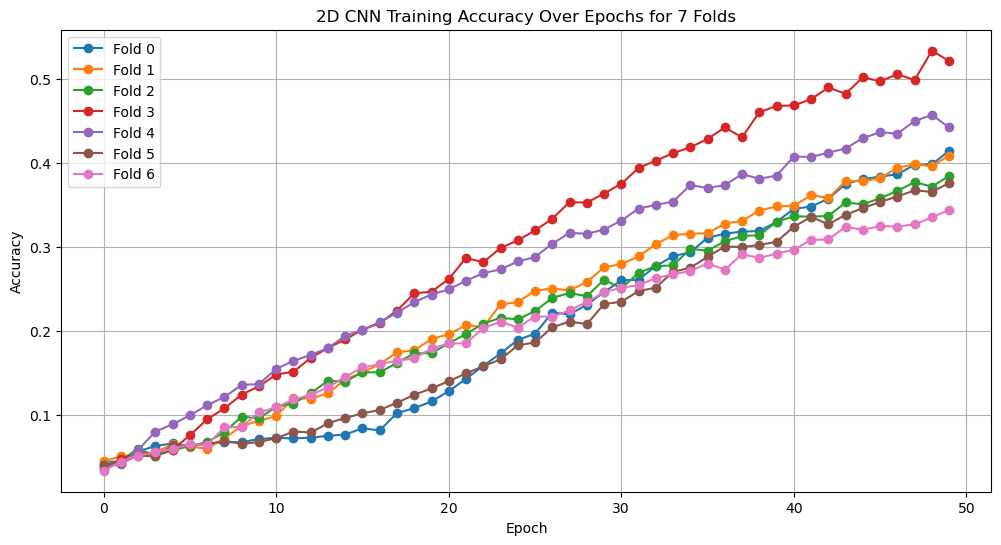

In [102]:
# Initialize a figure for better visibility
plt.figure(figsize=(12, 6))

# Loop through each fold and plot the accuracy
for i in range(7):  # Assuming there are 7 folds, from 0 to 6
    # Build the file path dynamically
    file_path = f'results/train_history/fold_{i}_cnn2d_history.csv'
    
    # Load the CSV file into a DataFrame, handle the incorrect header
    df = pd.read_csv(file_path, skipinitialspace=True)
    
    # If the file really starts with a leading comma, you might need to fix column names like this:
    df.columns = df.columns.str.strip(',')  # This removes commas from column names
    
    # Plotting the accuracy, assuming 'accuracy' is the corrected column name
    plt.plot(df.index, df['accuracy'], marker='o', linestyle='-', label=f'Fold {i}')

# Add title, labels, and legend to the plot
plt.title('2D CNN Training Accuracy Over Epochs for 7 Folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Shows which line corresponds to which fold
plt.grid(True)  # Enable grid for easier visualization

# Show the plot
plt.show()


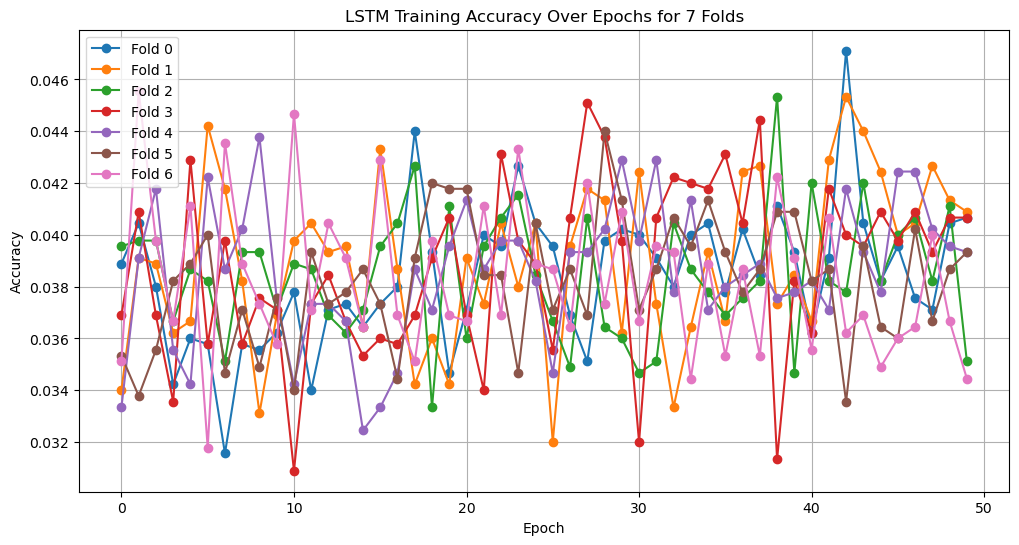

In [103]:

# Initialize a figure for better visibility
plt.figure(figsize=(12, 6))

# Loop through each fold and plot the accuracy
for i in range(7):  # Assuming there are 7 folds, from 0 to 6
    # Build the file path dynamically
    file_path = f'results/train_history/fold_{i}_lstm_history.csv'
    
    # Load the CSV file into a DataFrame, handle the incorrect header
    df = pd.read_csv(file_path, skipinitialspace=True)
    
    # If the file really starts with a leading comma, you might need to fix column names like this:
    df.columns = df.columns.str.strip(',')  # This removes commas from column names
    
    # Plotting the accuracy, assuming 'accuracy' is the corrected column name
    plt.plot(df.index, df['accuracy'], marker='o', linestyle='-', label=f'Fold {i}')

# Add title, labels, and legend to the plot
plt.title('LSTM Training Accuracy Over Epochs for 7 Folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()  # Shows which line corresponds to which fold
plt.grid(True)  # Enable grid for easier visualization

# Show the plot
plt.show()


Average accuracy of 1D CNN Across Folds: 0.1579047622425215
Max accuracy of 1D CNN is fold 6: 0.2160000056028366 

Average accuracy of 2D CNN Across Folds: 0.12742857102836874
Max accuracy of 2D CNN is fold 6: 0.1413333266973495 

Average accuracy of LSTM Across Folds: 0.04019047532762797
Max accuracy of LSTM is fold 2: 0.0426666662096977


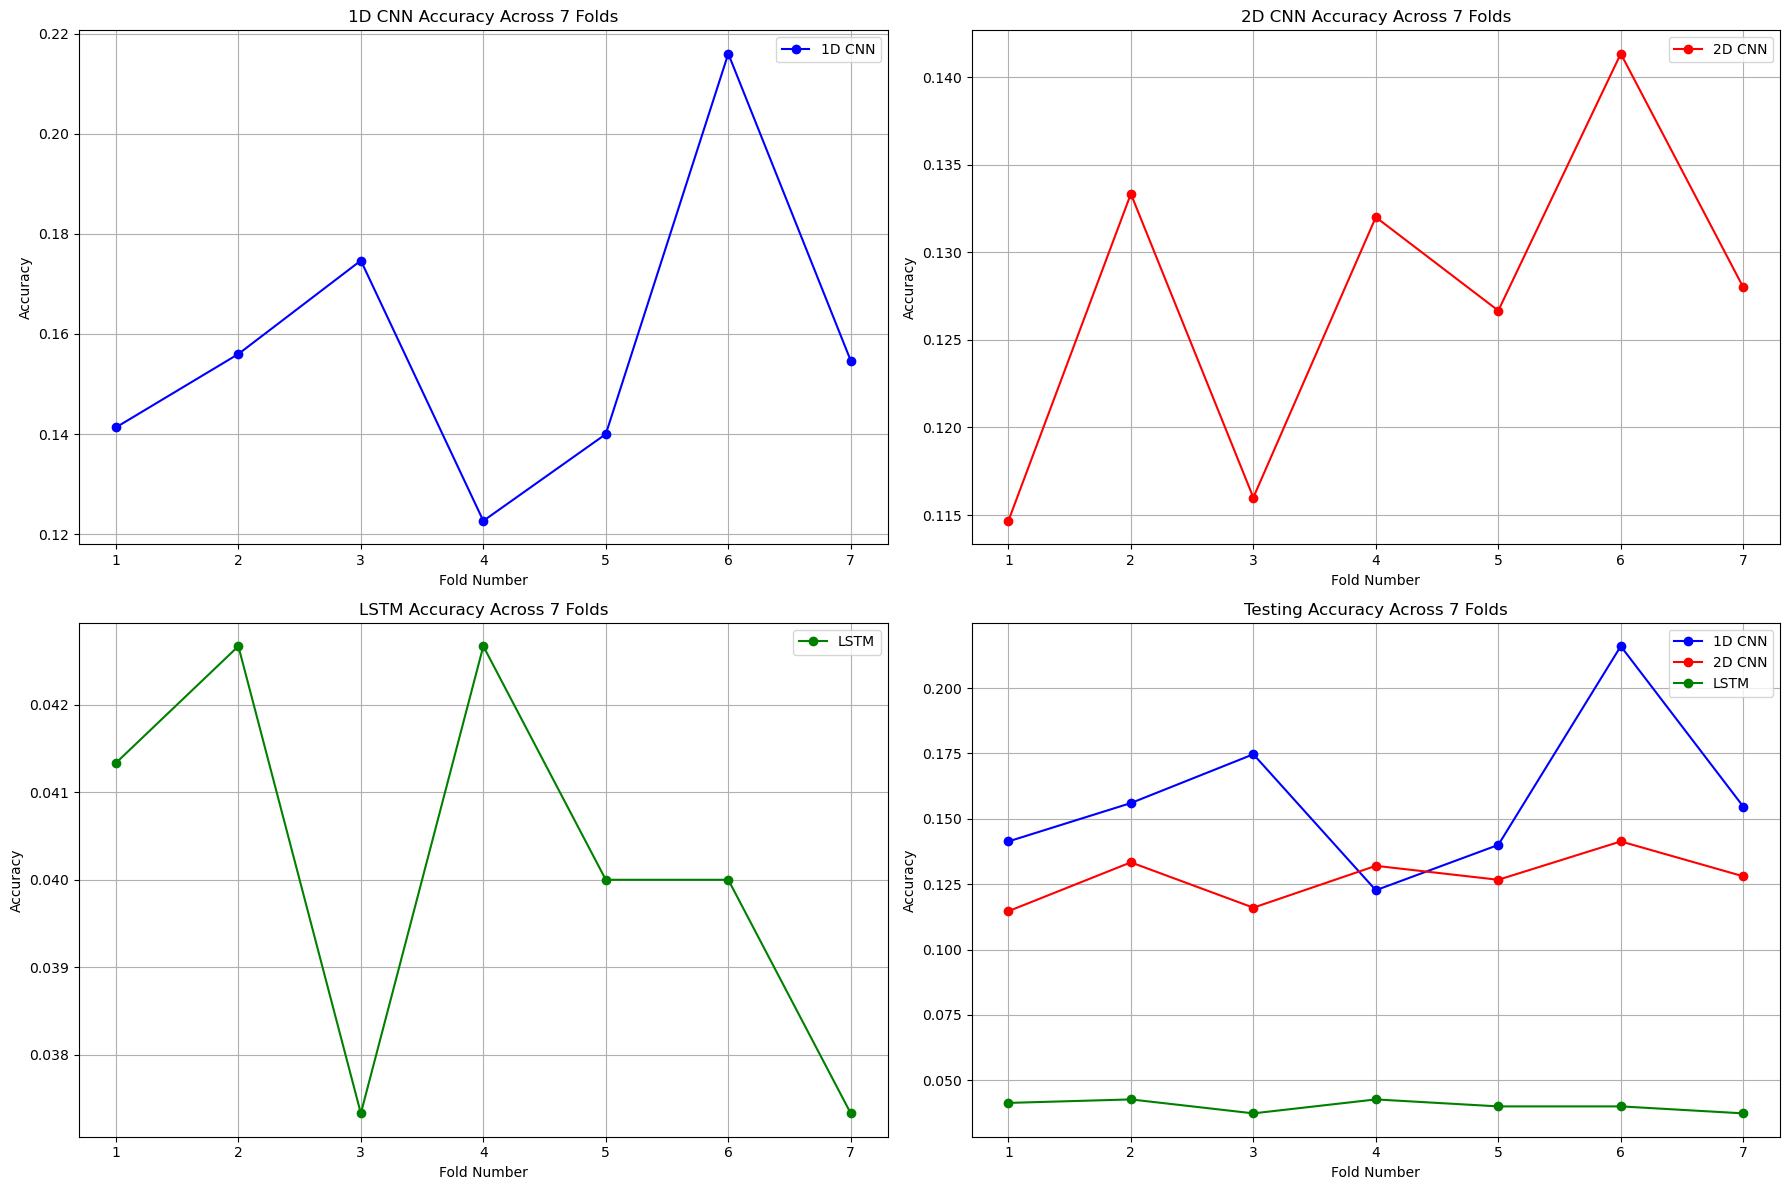

In [88]:
# Initialize lists to store accuracies
accuracy_1d_cnn = []
accuracy_2d_cnn = []
accuracy_lstm = []

# Loop over each fold
for fold_number in range(7):  # Assuming 7 folds, from 0 to 6
    # Load CSV files for each model
    df1d = pd.read_csv(f'results/eval_history/fold_{fold_number}_cnn1d_history.csv')
    df2d = pd.read_csv(f'results/eval_history/fold_{fold_number}_cnn2d_history.csv')
    df_lstm = pd.read_csv(f'results/eval_history/fold_{fold_number}_lstm_history.csv')
    
    # Extract accuracies for the second epoch (index 1)
    accuracy_values_1d = df1d.iloc[:, 1]  # Assumes accuracy is in the second column
    accuracy_1d_cnn.append(accuracy_values_1d[1])
    accuracy_values_2d = df2d.iloc[:, 1]
    accuracy_2d_cnn.append(accuracy_values_2d[1])
    accuracy_values_lstm = df_lstm.iloc[:, 1]
    accuracy_lstm.append(accuracy_values_lstm[1])

# Print average and maximum accuracies
print(f'Average accuracy of 1D CNN Across Folds: {sum(accuracy_1d_cnn) / len(accuracy_1d_cnn)}')
print(f'Max accuracy of 1D CNN is fold {accuracy_1d_cnn.index(max(accuracy_1d_cnn)) + 1}: {max(accuracy_1d_cnn)} \n')
print(f'Average accuracy of 2D CNN Across Folds: {sum(accuracy_2d_cnn) / len(accuracy_2d_cnn)}')
print(f'Max accuracy of 2D CNN is fold {accuracy_2d_cnn.index(max(accuracy_2d_cnn)) + 1}: {max(accuracy_2d_cnn)} \n')
print(f'Average accuracy of LSTM Across Folds: {sum(accuracy_lstm) / len(accuracy_lstm)}')
print(f'Max accuracy of LSTM is fold {accuracy_lstm.index(max(accuracy_lstm)) + 1}: {max(accuracy_lstm)}')

# Folds from 1 to 7
folds = range(1, 8) 

# Individual plots for each model
plt.figure(figsize=(18, 12))

# 1D CNN
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, position 1
plt.plot(folds, accuracy_1d_cnn, marker='o', color='blue', label='1D CNN')
plt.title('1D CNN Accuracy Across 7 Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.legend()
plt.grid(True)

# 2D CNN
plt.subplot(2, 2, 2)
plt.plot(folds, accuracy_2d_cnn, marker='o', color='red', label='2D CNN')
plt.title('2D CNN Accuracy Across 7 Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.legend()
plt.grid(True)

# LSTM
plt.subplot(2, 2, 3)
plt.plot(folds, accuracy_lstm, marker='o', color='green', label='LSTM')
plt.title('LSTM Accuracy Across 7 Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.legend()
plt.grid(True)

# Combined plot for all models
plt.subplot(2, 2, 4)
plt.plot(folds, accuracy_1d_cnn, marker='o', label='1D CNN', color='blue')
plt.plot(folds, accuracy_2d_cnn, marker='o', label='2D CNN', color='red')
plt.plot(folds, accuracy_lstm, marker='o', label='LSTM', color='green')
plt.title('Testing Accuracy Across 7 Folds')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Average Precision of 1D CNN: 0.6734594806058747
Max Precision is fold 4 of 1D CNN: 0.7983568542029505
Average Recall of 1D CNN: 0.5067936507936508
Max Recall is fold 2 of 1D CNN: 0.5123055555555556
Average F1 Score of 1D CNN: 0.5035517188772791
Max F1 Score is fold 2 of 1D CNN: 0.5144680490639502


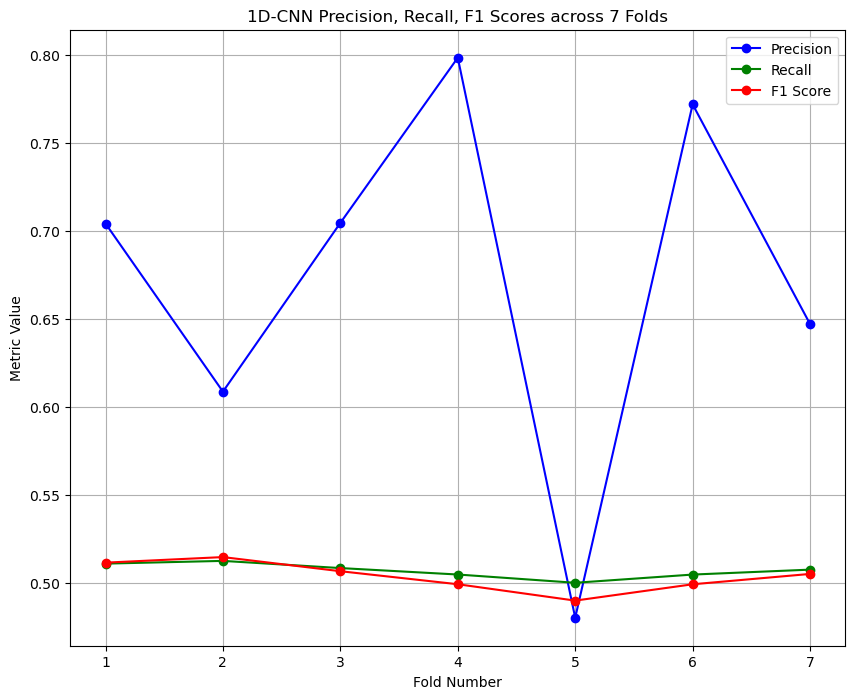

In [105]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize lists to store metrics for each fold
precisions = []
recalls = []
f1_scores = []

# Loop over each fold
for fold_number in range(7):  # Assuming folds from 0 to 6
    # Load CSV files
    df_predictions = pd.read_csv(f'results/pred_history/fold_{fold_number}_cnn1d_history.csv')
    df_truth = pd.read_csv(f'results/pred_history/fold_{fold_number}_ground_truth.csv')
    
    # Convert probability predictions to binary predictions (1 if probability >= 0.5, else 0)
    binary_predictions = (df_predictions.iloc[:, 1:] >= 0.5).astype(int)  # skip the first column if it's just indices

    # Extract true labels, assuming they are already in binary format
    true_labels = df_truth.iloc[:, 1:]  # also skip the first column if it's just indices

    # Flatten the data for metric calculation
    predictions_flat = binary_predictions.values.flatten()
    truth_flat = true_labels.values.flatten()

    # Calculate Precision, Recall, and F1 Score
    precision = precision_score(truth_flat, predictions_flat, average='macro')
    recall = recall_score(truth_flat, predictions_flat, average='macro')
    f1 = f1_score(truth_flat, predictions_flat, average='macro')

    # Store the results
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate average and maximum of each metric
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1_scores) / len(f1_scores)
max_precision = max(precisions)
max_recall = max(recalls)
max_f1 = max(f1_scores)

# Print the results
print(f"Average Precision of 1D CNN: {average_precision}")
print(f"Max Precision is fold {precisions.index(max_precision) + 1} of 1D CNN: {max_precision}")
print(f"Average Recall of 1D CNN: {average_recall}")
print(f"Max Recall is fold {recalls.index(max_recall) + 1} of 1D CNN: {max_recall}")
print(f"Average F1 Score of 1D CNN: {average_f1}")
print(f"Max F1 Score is fold {f1_scores.index(max_f1) + 1} of 1D CNN: {max_f1}")

# Graph precision, recall, f1 scores across folds
folds = range(1, 8)  # Folds from 1 to 7

plt.figure(figsize=(10, 8))
plt.plot(folds, precisions, marker='o', color='blue', label='Precision')
plt.plot(folds, recalls, marker='o', color='green', label='Recall')
plt.plot(folds, f1_scores, marker='o', color='red', label='F1 Score')
plt.title('1D-CNN Precision, Recall, F1 Scores across 7 Folds')
plt.xlabel('Fold Number')
plt.ylabel('Metric Value')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

Average Precision of 2D CNN: 0.1789381981165144
Max Precision is fold 7 of 2D CNN: 0.2336448598130841
Average Recall of 2D CNN: 0.044
Max Recall is fold 2 of 2D CNN: 0.07066666666666667
Average F1 Score of 2D CNN: 0.06886757316925651
Max F1 Score is fold 2 of 2D CNN: 0.10371819960861056


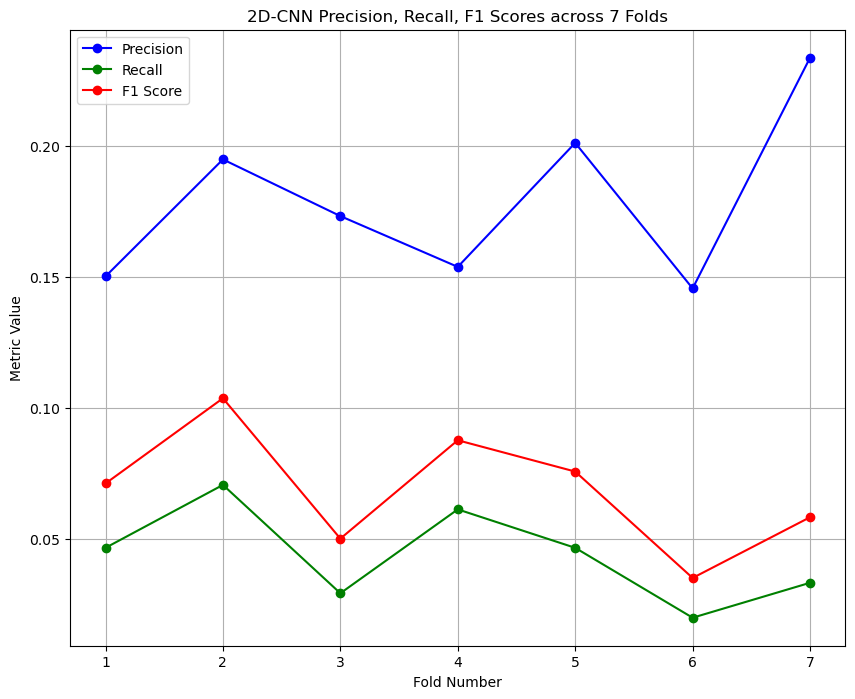

In [106]:
# Initialize lists to store metrics for each fold
precisions = []
recalls = []
f1_scores = []

# Loop over each fold
for fold_number in range(7):  # Assuming folds from 0 to 6
    # Load CSV files
    df_predictions = pd.read_csv(f'results/pred_history/fold_{fold_number}_cnn2d_history.csv')
    df_truth = pd.read_csv(f'results/pred_history/fold_{fold_number}_ground_truth.csv')
    
    # Convert probability predictions to binary predictions (1 if probability >= 0.5, else 0)
    binary_predictions = (df_predictions.iloc[:, 1:] >= 0.5).astype(int)  # skip the first column if it's just indices

    # Extract true labels, assuming they are already in binary format
    true_labels = df_truth.iloc[:, 1:]  # also skip the first column if it's just indices

    # Flatten the data for metric calculation
    predictions_flat = binary_predictions.values.flatten()
    truth_flat = true_labels.values.flatten()

    # Calculate Precision, Recall, and F1 Score
    precision = precision_score(truth_flat, predictions_flat)
    recall = recall_score(truth_flat, predictions_flat)
    f1 = f1_score(truth_flat, predictions_flat)

    # Store the results
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate average and maximum of each metric
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1_scores) / len(f1_scores)
max_precision = max(precisions)
max_recall = max(recalls)
max_f1 = max(f1_scores)

# Print the results
print(f"Average Precision of 2D CNN: {average_precision}")
print(f"Max Precision is fold {precisions.index(max_precision) + 1} of 2D CNN: {max_precision}")
print(f"Average Recall of 2D CNN: {average_recall}")
print(f"Max Recall is fold {recalls.index(max_recall) + 1} of 2D CNN: {max_recall}")
print(f"Average F1 Score of 2D CNN: {average_f1}")
print(f"Max F1 Score is fold {f1_scores.index(max_f1) + 1} of 2D CNN: {max_f1}")

# Graph precision, recall, f1 scores across folds
folds = range(1, 8)  # Folds from 1 to 7

plt.figure(figsize=(10, 8))
plt.plot(folds, precisions, marker='o', color='blue', label='Precision')
plt.plot(folds, recalls, marker='o', color='green', label='Recall')
plt.plot(folds, f1_scores, marker='o', color='red', label='F1 Score')
plt.title('2D-CNN Precision, Recall, F1 Scores across 7 Folds')
plt.xlabel('Fold Number')
plt.ylabel('Metric Value')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

Average Precision of LSTM: 0.0
Max Precision is fold 1 of LSTM: 0.0
Average Recall of LSTM: 0.0
Max Recall is fold 1 of LSTM: 0.0
Average F1 Score of LSTM: 0.0
Max F1 Score is fold 1 of LSTM: 0.0


/Users/anushnandyala/miniconda3/envs/ml_hw3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushnandyala/miniconda3/envs/ml_hw3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushnandyala/miniconda3/envs/ml_hw3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/anushnandyala/minicon

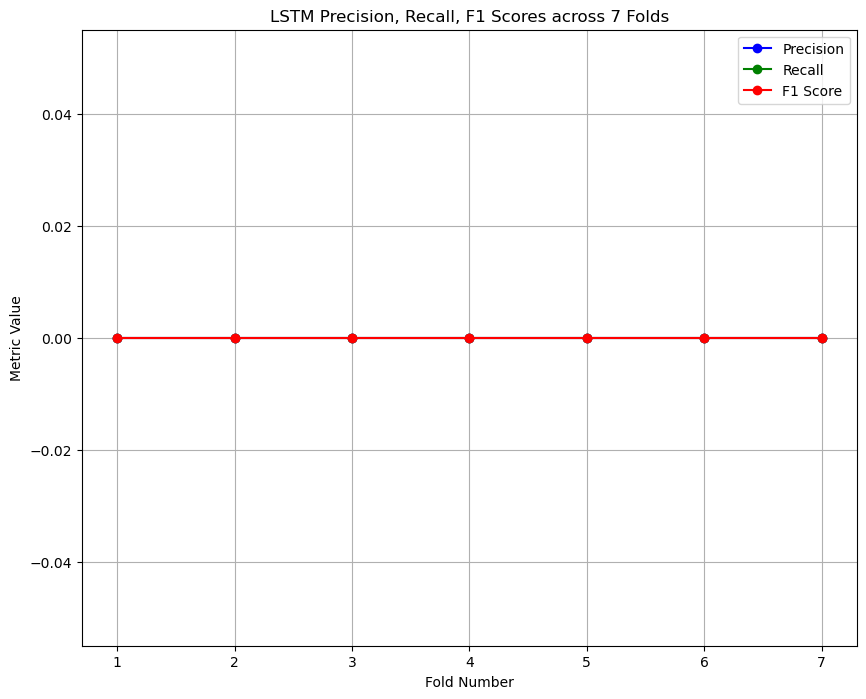

In [107]:
# Initialize lists to store metrics for each fold
precisions = []
recalls = []
f1_scores = []

# Loop over each fold
for fold_number in range(7):  # Assuming folds from 0 to 6
    # Load CSV files
    df_predictions = pd.read_csv(f'results/pred_history/fold_{fold_number}_lstm_history.csv')
    df_truth = pd.read_csv(f'results/pred_history/fold_{fold_number}_ground_truth.csv')
    
    # Convert probability predictions to binary predictions (1 if probability >= 0.5, else 0)
    binary_predictions = (df_predictions.iloc[:, 1:] >= 0.5).astype(int)  # skip the first column if it's just indices

    # Extract true labels, assuming they are already in binary format
    true_labels = df_truth.iloc[:, 1:]  # also skip the first column if it's just indices

    # Flatten the data for metric calculation
    predictions_flat = binary_predictions.values.flatten()
    truth_flat = true_labels.values.flatten()

    # Calculate Precision, Recall, and F1 Score
    precision = precision_score(truth_flat, predictions_flat)
    recall = recall_score(truth_flat, predictions_flat)
    f1 = f1_score(truth_flat, predictions_flat)

    # Store the results
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Calculate average and maximum of each metric
average_precision = sum(precisions) / len(precisions)
average_recall = sum(recalls) / len(recalls)
average_f1 = sum(f1_scores) / len(f1_scores)
max_precision = max(precisions)
max_recall = max(recalls)
max_f1 = max(f1_scores)

# Print the results
print(f"Average Precision of LSTM: {average_precision}")
print(f"Max Precision is fold {precisions.index(max_precision) + 1} of LSTM: {max_precision}")
print(f"Average Recall of LSTM: {average_recall}")
print(f"Max Recall is fold {recalls.index(max_recall) + 1} of LSTM: {max_recall}")
print(f"Average F1 Score of LSTM: {average_f1}")
print(f"Max F1 Score is fold {f1_scores.index(max_f1) + 1} of LSTM: {max_f1}")

# Graph precision, recall, f1 scores across folds
folds = range(1, 8)  # Folds from 1 to 7

plt.figure(figsize=(10, 8))
plt.plot(folds, precisions, marker='o', color='blue', label='Precision')
plt.plot(folds, recalls, marker='o', color='green', label='Recall')
plt.plot(folds, f1_scores, marker='o', color='red', label='F1 Score')
plt.title('LSTM Precision, Recall, F1 Scores across 7 Folds')
plt.xlabel('Fold Number')
plt.ylabel('Metric Value')
plt.xticks(folds)
plt.legend()
plt.grid(True)
plt.show()

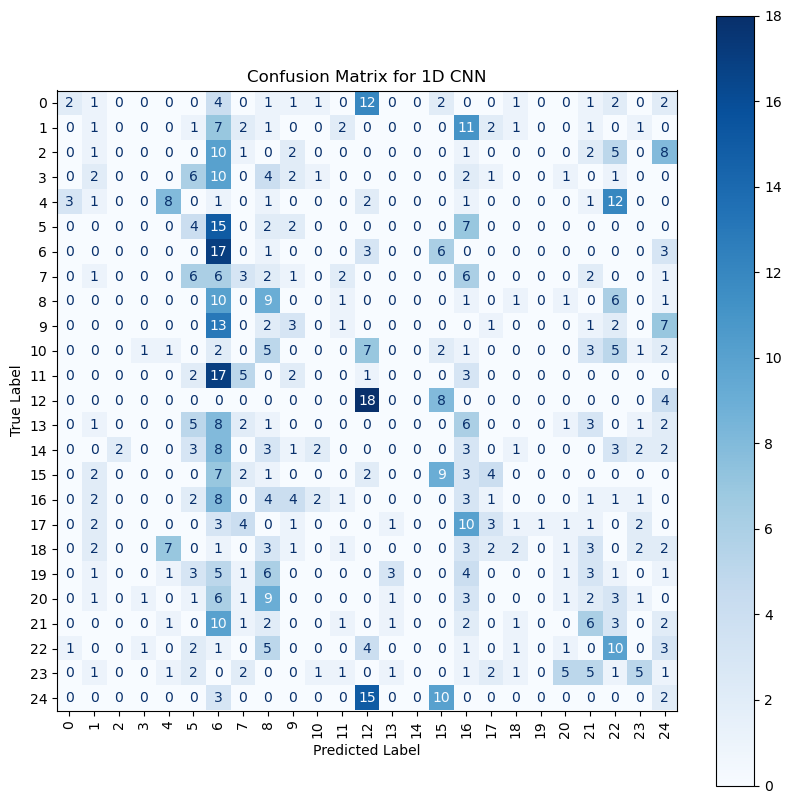

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load your data
df_predictions = pd.read_csv('results/pred_history/fold_0_cnn1d_history.csv')  # Probabilities from your model
df_truth = pd.read_csv('results/pred_history/fold_0_ground_truth.csv')  # Ground truth labels

# Convert the probabilities to class predictions
predicted_classes = df_predictions.iloc[:, 1:].idxmax(axis=1).astype(int)  # Ensure integer type

# Convert binary truth to single class labels
true_classes = df_truth.iloc[:, 1:].idxmax(axis=1).astype(int)  # Ensure integer type

# Ensure labels are correctly defined as integers
labels = np.arange(25)  # Assuming 25 classes, adjust as necessary

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes, labels=labels)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x labels if they overlap
plt.yticks(rotation=0)
plt.title('Confusion Matrix for 1D CNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


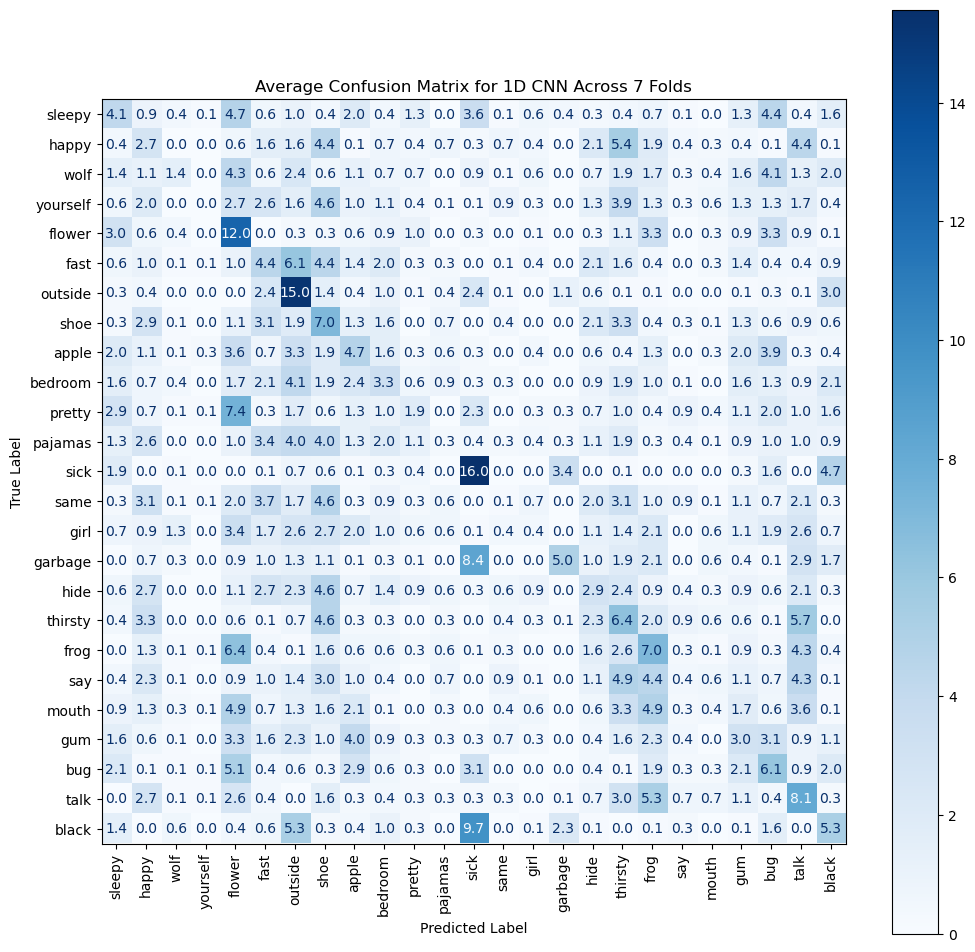

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

num_folds = 7
num_classes = 25  # Assuming 24 classes

# Define the mapping of numeric labels to words
label_mapping = {
    0: "sleepy", 1: "happy", 2: "wolf", 3: "yourself", 4: "flower", 
    5: "fast", 6: "outside", 7: "shoe", 8: "apple", 9: "bedroom", 
    10: "pretty", 11: "pajamas", 12: "sick", 13: "same", 14: "girl", 
    15: "garbage", 16: "hide", 17: "thirsty", 18: "frog", 19: "say", 
    20: "mouth", 21: "gum", 22: "bug", 23: "talk", 24: "black"
}

# Initialize a cumulative confusion matrix
cumulative_confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Loop over each fold
for fold_number in range(num_folds):
    # Load prediction and ground truth data for the fold
    df_predictions = pd.read_csv(f'results/pred_history/fold_{fold_number}_cnn1d_history.csv')
    df_truth = pd.read_csv(f'results/pred_history/fold_{fold_number}_ground_truth.csv')

    # Convert the probabilities to class predictions
    predicted_classes = df_predictions.iloc[:, 1:].idxmax(axis=1).astype(int)

    # Convert binary truth to single class labels
    true_classes = df_truth.iloc[:, 1:].idxmax(axis=1).astype(int)

    # Calculate the confusion matrix for the current fold
    cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(num_classes))
    
    # Accumulate the confusion matrix
    cumulative_confusion_matrix += cm

# Calculate the average confusion matrix
average_confusion_matrix = cumulative_confusion_matrix / num_folds

# Plot the average confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=average_confusion_matrix, display_labels=label_mapping.values())
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x labels if they overlap
plt.yticks(rotation=0)
plt.title('Average Confusion Matrix for 1D CNN Across 7 Folds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Round display values to one decimal place
if disp.text_ is not None:
    for text_row in disp.text_:
        for text in text_row:
            val = float(text.get_text())
            text.set_text(f"{val:.1f}")

plt.show()


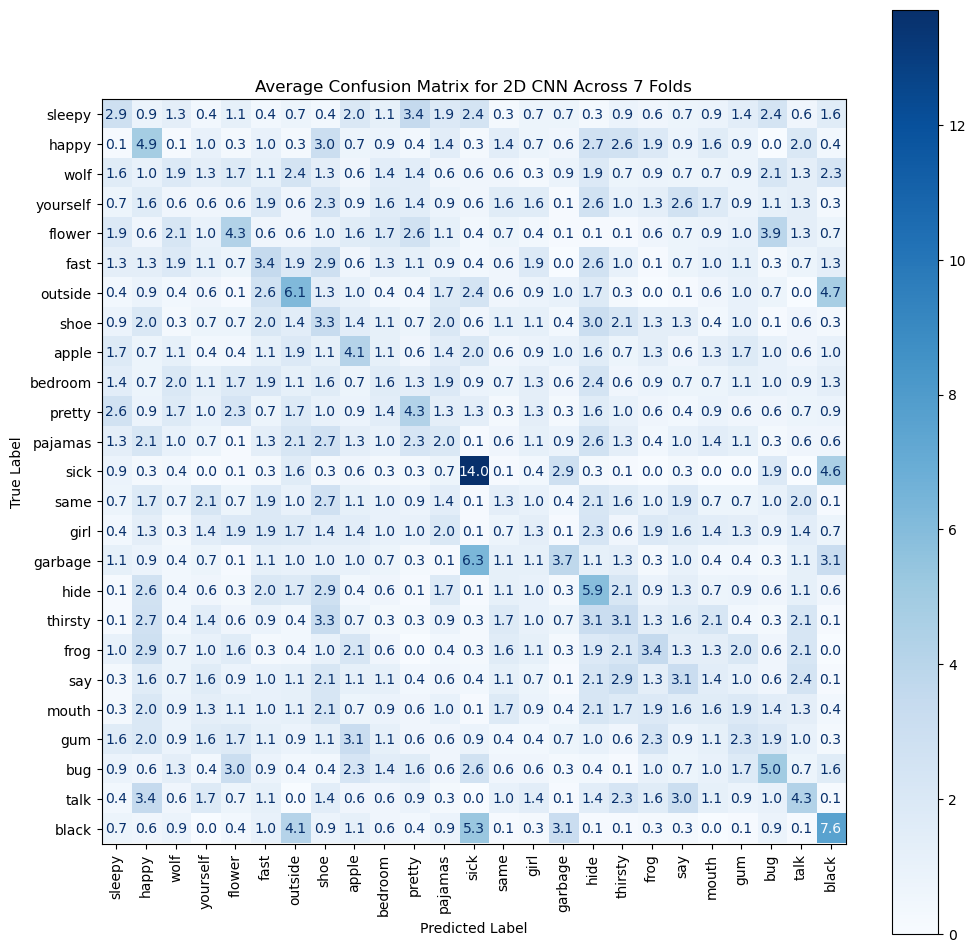

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

num_folds = 7
num_classes = 25  # Assuming 24 classes

# Define the mapping of numeric labels to words
label_mapping = {
    0: "sleepy", 1: "happy", 2: "wolf", 3: "yourself", 4: "flower", 
    5: "fast", 6: "outside", 7: "shoe", 8: "apple", 9: "bedroom", 
    10: "pretty", 11: "pajamas", 12: "sick", 13: "same", 14: "girl", 
    15: "garbage", 16: "hide", 17: "thirsty", 18: "frog", 19: "say", 
    20: "mouth", 21: "gum", 22: "bug", 23: "talk", 24: "black"
}

# Initialize a cumulative confusion matrix
cumulative_confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Loop over each fold
for fold_number in range(num_folds):
    # Load prediction and ground truth data for the fold
    df_predictions = pd.read_csv(f'results/pred_history/fold_{fold_number}_cnn2d_history.csv')
    df_truth = pd.read_csv(f'results/pred_history/fold_{fold_number}_ground_truth.csv')

    # Convert the probabilities to class predictions
    predicted_classes = df_predictions.iloc[:, 1:].idxmax(axis=1).astype(int)

    # Convert binary truth to single class labels
    true_classes = df_truth.iloc[:, 1:].idxmax(axis=1).astype(int)

    # Calculate the confusion matrix for the current fold
    cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(num_classes))
    
    # Accumulate the confusion matrix
    cumulative_confusion_matrix += cm

# Calculate the average confusion matrix
average_confusion_matrix = cumulative_confusion_matrix / num_folds

# Plot the average confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=average_confusion_matrix, display_labels=label_mapping.values())
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x labels if they overlap
plt.yticks(rotation=0)
plt.title('Average Confusion Matrix for 2D CNN Across 7 Folds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Round display values to one decimal place
if disp.text_ is not None:
    for text_row in disp.text_:
        for text in text_row:
            val = float(text.get_text())
            text.set_text(f"{val:.1f}")

plt.show()


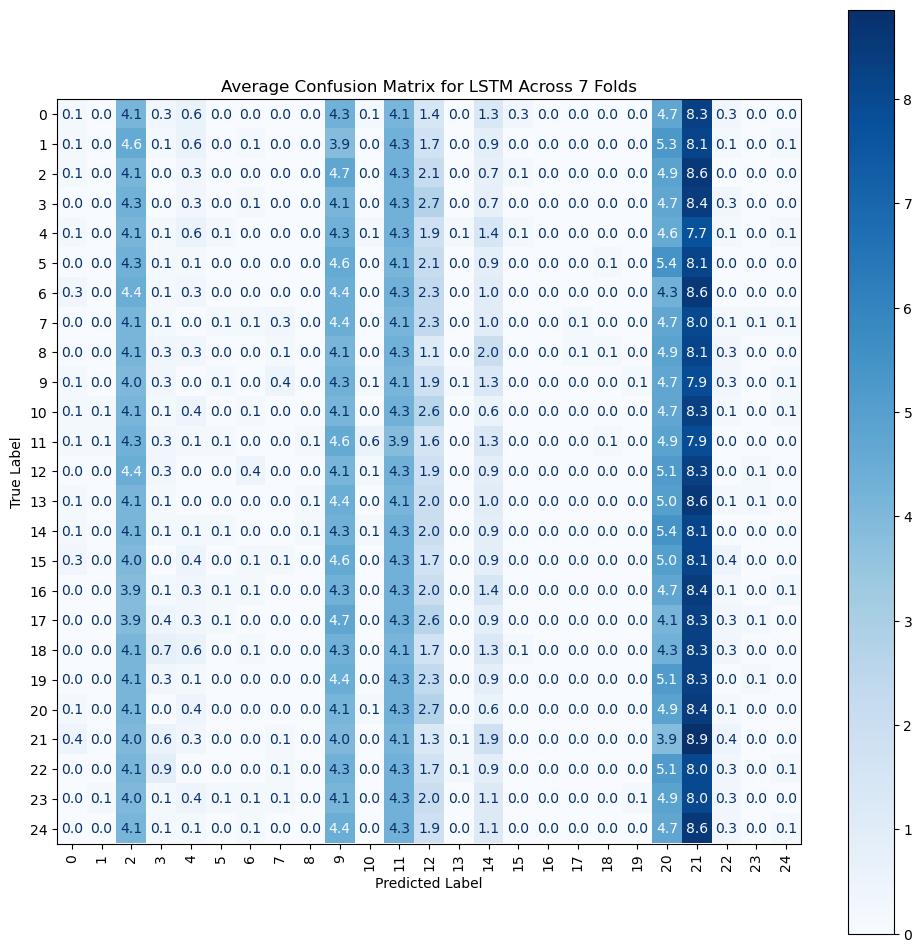

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

num_folds = 7
num_classes = 25  # Assuming 24 classes

# Define the mapping of numeric labels to words
label_mapping = {
    0: "sleepy", 1: "happy", 2: "wolf", 3: "yourself", 4: "flower", 
    5: "fast", 6: "outside", 7: "shoe", 8: "apple", 9: "bedroom", 
    10: "pretty", 11: "pajamas", 12: "sick", 13: "same", 14: "girl", 
    15: "garbage", 16: "hide", 17: "thirsty", 18: "frog", 19: "say", 
    20: "mouth", 21: "gum", 22: "bug", 23: "talk", 24: "black"
}

# Initialize a cumulative confusion matrix
cumulative_confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Loop over each fold
for fold_number in range(num_folds):
    # Load prediction and ground truth data for the fold
    df_predictions = pd.read_csv(f'results/pred_history/fold_{fold_number}_lstm_history.csv')
    df_truth = pd.read_csv(f'results/pred_history/fold_{fold_number}_ground_truth.csv')

    # Convert the probabilities to class predictions
    predicted_classes = df_predictions.iloc[:, 1:].idxmax(axis=1).astype(int)

    # Convert binary truth to single class labels
    true_classes = df_truth.iloc[:, 1:].idxmax(axis=1).astype(int)

    # Calculate the confusion matrix for the current fold
    cm = confusion_matrix(true_classes, predicted_classes, labels=np.arange(num_classes))
    
    # Accumulate the confusion matrix
    cumulative_confusion_matrix += cm

# Calculate the average confusion matrix
average_confusion_matrix = cumulative_confusion_matrix / num_folds

# Plot the average confusion matrix
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust the size as needed
disp = ConfusionMatrixDisplay(confusion_matrix=average_confusion_matrix, display_labels=label_mapping.values())
disp.plot(ax=ax, cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x labels if they overlap
plt.yticks(rotation=0)
plt.title('Average Confusion Matrix for LSTM Across 7 Folds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Round display values to one decimal place
if disp.text_ is not None:
    for text_row in disp.text_:
        for text in text_row:
            val = float(text.get_text())
            text.set_text(f"{val:.1f}")

plt.show()

